In [1]:
# Import libraries 

import numpy as np
import pandas as pd

In [2]:
# Import data as data

data= pd.read_csv('data.csv')

In [3]:
# Checking data type

data.info()
data['TotalCharges']= pd.to_numeric(data['TotalCharges'], errors= 'coerce')
data['SeniorCitizen']= data['SeniorCitizen'].astype('str')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
# Statistical vales of the numerical variables

data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [5]:
# Top 5 rows of the data

data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration

In [6]:
# The variance of the three variables 

data.groupby(['Churn']).std()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,24.113777,31.092648,2329.456984
Yes,19.531123,24.666053,1890.822994


In [7]:
# Types of Contract relative to Churn

data.groupby('Contract')['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: Churn, dtype: int64

In [8]:
# # Types of Payment Method relative to Churn

data.groupby('PaymentMethod')['Churn'].value_counts()

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: Churn, dtype: int64

In [9]:
# Types of InternetService and SeniorCitizen relative to Churn

print(data.groupby('InternetService')['Churn'].value_counts())
data.groupby('SeniorCitizen')['Churn'].value_counts()

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: Churn, dtype: int64


SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64

# Data Visulization

In [10]:
# Importing libraries

import matplotlib.pyplot as plt
import seaborn as sb

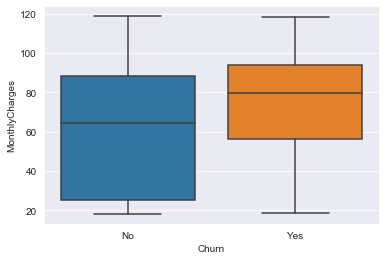

In [11]:
# Box-plot of Monthly Chatges by Churn

sb.set_style("darkgrid")
sb.boxplot(x= 'Churn',
          y= 'MonthlyCharges',
          data= data)

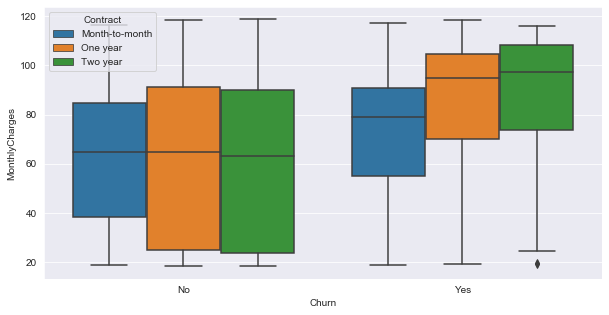

In [12]:
# Box-plot of Monthly Charges by Churn and divided by Contract

sb.set_style("darkgrid")
plt.figure(figsize=(10,5))
sb.boxplot(x= 'Churn',
          y= 'MonthlyCharges',
          hue = 'Contract',
          data= data)
plt.legend(title='Contract', loc='upper left')

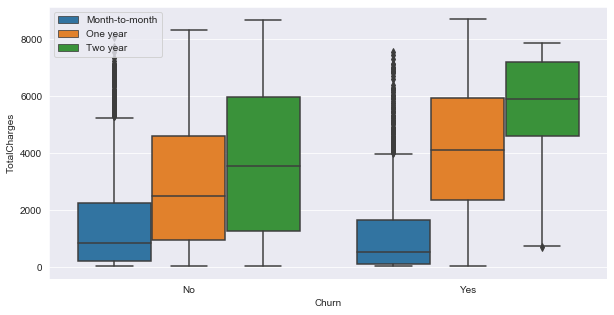

In [13]:
# Box-plot of Total Charges by Churn and divided by Contract

plt.figure(figsize=(10,5))
sb.boxplot(x= 'Churn',
          y= 'TotalCharges',
          hue = 'Contract',
          data= data)
plt.legend(loc= 'upper left')

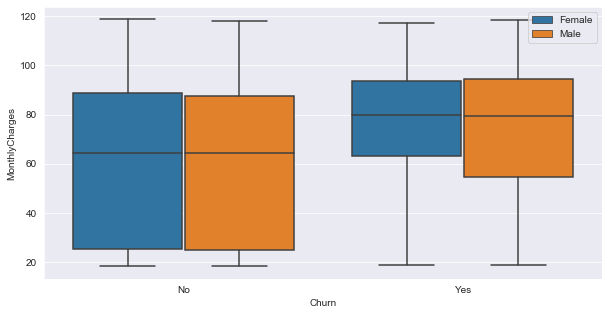

In [14]:
# Box-plot of Monthly Charges by Churn divided by gender

plt.figure(figsize=(10,5))
sb.boxplot(x= 'Churn',
          y= 'MonthlyCharges',
          hue = 'gender',
          data= data)
plt.legend(loc= 'upper right')

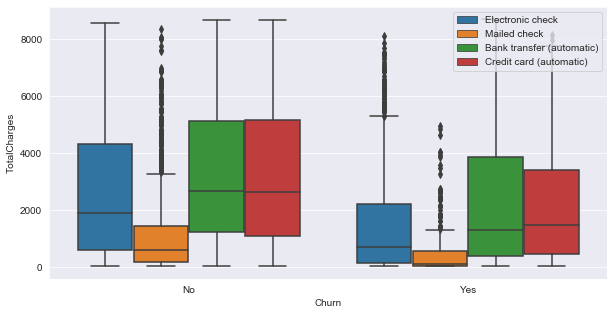

In [15]:
# Box-plot of Total Charges by Churn and divided by payment method

plt.figure(figsize=(10,5))
sb.boxplot(x= 'Churn',
          y= 'TotalCharges',
          hue = 'PaymentMethod',
          data= data)
plt.legend(loc= 'upper right')

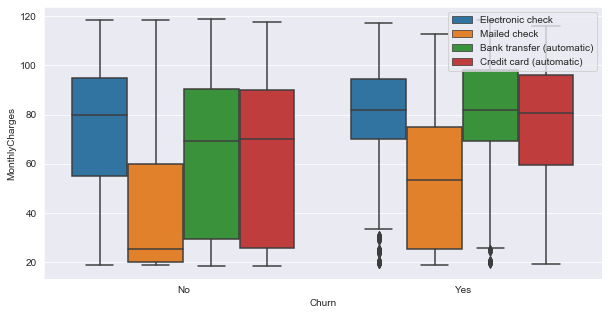

In [16]:
# Box-plot of Monthly Charges by Churn and divided by payment method

plt.figure(figsize=(10,5))
sb.boxplot(x= 'Churn',
          y= 'MonthlyCharges',
          hue = 'PaymentMethod',
          data= data)
plt.legend(loc= 'upper right')

In [17]:
# Cleaning and preparing data for logistic regression

data['Partner']= data['Partner'].replace({'No': 0, 'Yes': 1})
data['gender']= data['gender'].replace({'Female': 0, 'Male': 1})
data['Dependents']= data['Dependents'].replace({'No': 0, 'Yes': 1})
data['PhoneService']= data['PhoneService'].replace({'No': 0, 'Yes': 1})
data['Contract']= data['Contract'].replace({'One year': 0, 'Two year': 1, 'Month-to-month': 2 })

In [18]:
data['Contract'].value_counts()

2    3875
1    1695
0    1473
Name: Contract, dtype: int64

In [19]:
# Removing NaN and Infinite value 

data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(999, inplace=True)

# Data Model

In [20]:
# Importing machine learning libraries

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [29]:
# Normalize data and selecting variable for the model

data_n= data[['gender','Partner','Dependents','tenure','PhoneService','Contract','TotalCharges']]
normalized_data = preprocessing.scale(data_n)

In [30]:
# Splitting test and train data

x= normalized_data
y= data['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=232)

In [31]:
# Cheacking if the data has normalized or not

x_train

array([[ 0.99053183, -0.96662231, -0.65401193, ...,  0.32743831,
        -0.42530691,  0.99459179],
       [-1.00955867,  1.03453023, -0.65401193, ...,  0.32743831,
         0.82175245,  2.06236891],
       [ 0.99053183, -0.96662231, -0.65401193, ...,  0.32743831,
         0.82175245, -0.01196014],
       ...,
       [-1.00955867, -0.96662231, -0.65401193, ...,  0.32743831,
         0.82175245, -0.87094477],
       [-1.00955867, -0.96662231, -0.65401193, ...,  0.32743831,
         0.82175245,  0.92211034],
       [-1.00955867, -0.96662231, -0.65401193, ..., -3.05401039,
         0.82175245, -0.83488062]])

In [32]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
print(lr.coef_)
print(lr.intercept_)

[[-0.01026231  0.0542046  -0.24211269 -2.29351357 -0.11931483  0.53754052
   1.66468331]]
[-1.55560387]


In [34]:
y_pred = lr.predict(x_test)

In [35]:
print('Confusion Metrix')
cm= confusion_matrix(y_test, y_pred)
print(cm)
print('')
print('Accuracy of the Model')
print(metrics.accuracy_score(y_test, y_pred))

Confusion Metrix
[[1159  147]
 [ 248  207]]

Accuracy of the Model
0.7756956274843839
